In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df.sample(5)

,Age,EstimatedSalary,Purchased
369,54,26000,1
181,31,71000,0
69,31,68000,0
46,25,79000,0
335,36,54000,0


In [4]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(df.drop("Purchased", axis = 1) , df["Purchased"] , test_size = 0.2 ,
                                                       random_state= 0,
                                                       )

In [5]:
X_train.shape , X_test.shape

((320, 2), (80, 2))

# **Standard Scaler**

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

### fitting
scaler.fit(X_train)

### Transforming
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled  , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled  , columns = X_test.columns)

In [9]:
X_train_scaled.head()

,Age,EstimatedSalary
0,1.922950,2.146016
1,2.020161,0.378719
2,-1.382215,-0.432499
3,-1.187794,-1.011940
4,1.922950,-0.925024


In [10]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


# **Effect of Scaling**

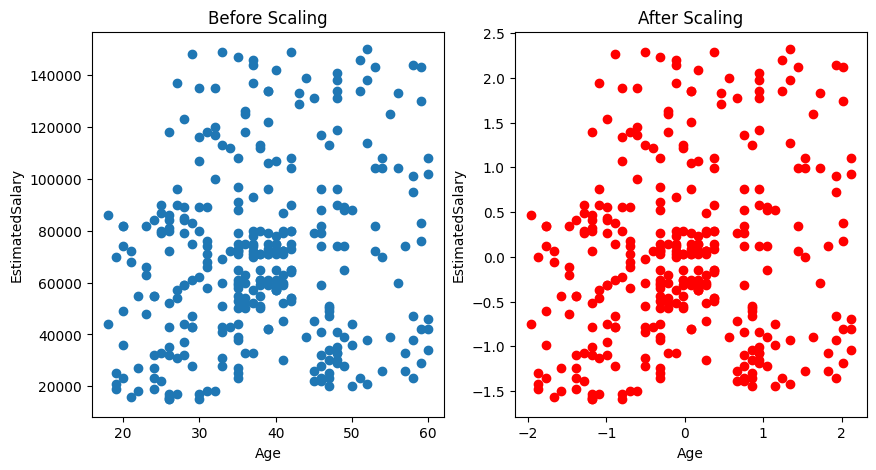

In [11]:
figure , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (10,5))

ax1.scatter(X_train["Age"] , X_train["EstimatedSalary"])
ax1.set_xlabel("Age")
ax1.set_ylabel("EstimatedSalary")
ax1.set_title("Before Scaling")


ax2.scatter(X_train_scaled["Age"] , X_train_scaled["EstimatedSalary"] , color = "red")
ax2.set_xlabel("Age")
ax2.set_ylabel("EstimatedSalary")
ax2.set_title("After Scaling")
plt.show()

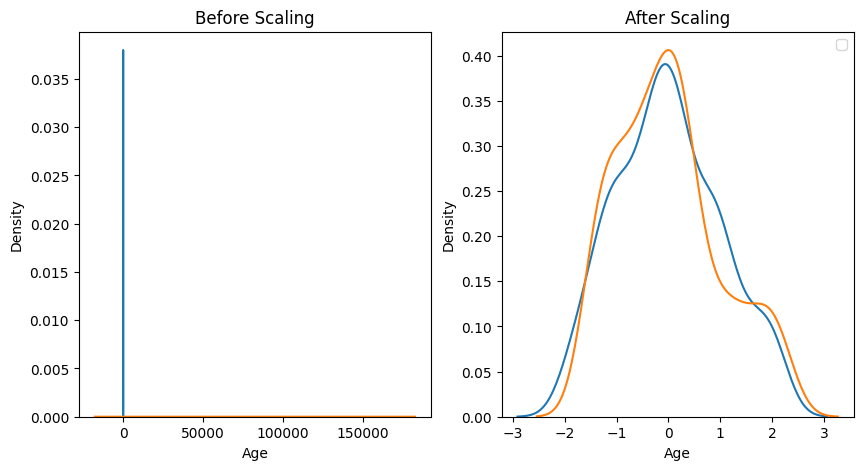

In [12]:
fig  , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (10,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax = ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax = ax1)

# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"] , ax = ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"] , ax = ax2)
plt.legend()
plt.show()

# **Comparision of Distribution Plot**

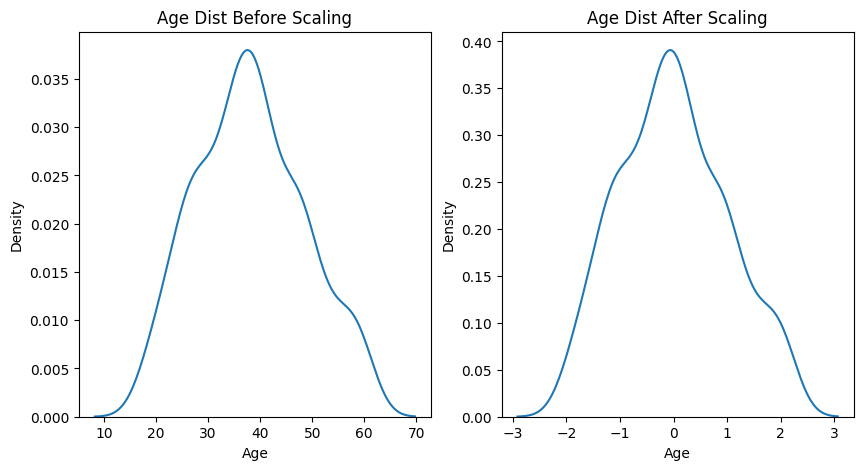

In [13]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (10,5))

## Before Scaling
ax1.set_title("Age Dist Before Scaling")
sns.kdeplot(X_train["Age"] , ax = ax1)

# After Scaling
ax2.set_title("Age Dist After Scaling")
sns.kdeplot(X_train_scaled["Age"] , ax = ax2)
plt.show()

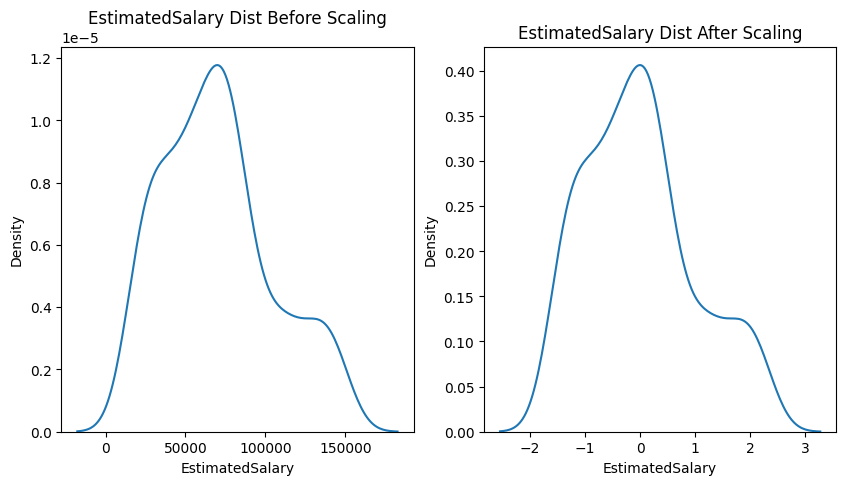

In [14]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (10,5))

## Before Scaling
ax1.set_title("EstimatedSalary Dist Before Scaling")
sns.kdeplot(X_train["EstimatedSalary"] , ax = ax1)

# After Scaling
ax2.set_title("EstimatedSalary Dist After Scaling")
sns.kdeplot(X_train_scaled["EstimatedSalary"] , ax = ax2)
plt.show()

# **Why Scaling is Essential**

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [16]:
lr.fit(X_train , y_train)
lr_scaled.fit(X_train_scaled , y_train)

LogisticRegression()

In [17]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [18]:
from sklearn.metrics import accuracy_score

print("Actual: ", accuracy_score(y_test , y_pred))
print("Scaled: ", accuracy_score(y_test , y_pred_scaled))

Actual:  0.9125
Scaled:  0.925


In [19]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# **Effect of Outlier**

In [20]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [22]:
new_df = pd.DataFrame({"Age" : [2,91,97] , "EstimatedSalary" : [2000,250000,410000] , "Purchased" : [0,1,1]})
new_df

,Age,EstimatedSalary,Purchased
0,2,2000,0
1,91,250000,1
2,97,410000,1


In [24]:
df = pd.concat([df , new_df] , ignore_index = True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
401,91,250000,1
402,97,410000,1
403,2,2000,0
404,91,250000,1


In [38]:
X_train , X_test , y_train , y_test = train_test_split(df.drop("Purchased" , axis = 1) , df["Purchased"] , test_size = 0.2,
                                                       random_state = 0)

In [39]:
X_train.shape , X_test.shape

((324, 2), (82, 2))

In [40]:
new_scaler = StandardScaler()
new_scaler.fit(X_train)

X_train_scaled = new_scaler.transform(X_train)
X_test_scaled = new_scaler.transform(X_test)

In [41]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [42]:
X_train_scaled.head()

,Age,EstimatedSalary
0,-0.115418,1.638332
1,0.047525,0.074312
2,-0.359833,0.889364
3,1.676956,0.250540
4,-1.174548,-0.366257


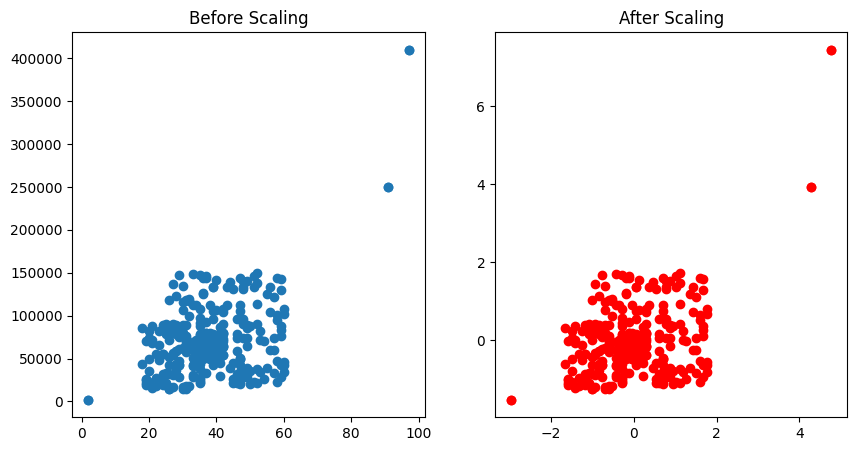

In [44]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (10,5))

### Before Scaling
ax1.set_title("Before Scaling")
ax1.scatter(X_train["Age"] , X_train["EstimatedSalary"])

### After Scaling
ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled["Age"] , X_train_scaled["EstimatedSalary"] , color = "red")
plt.show()

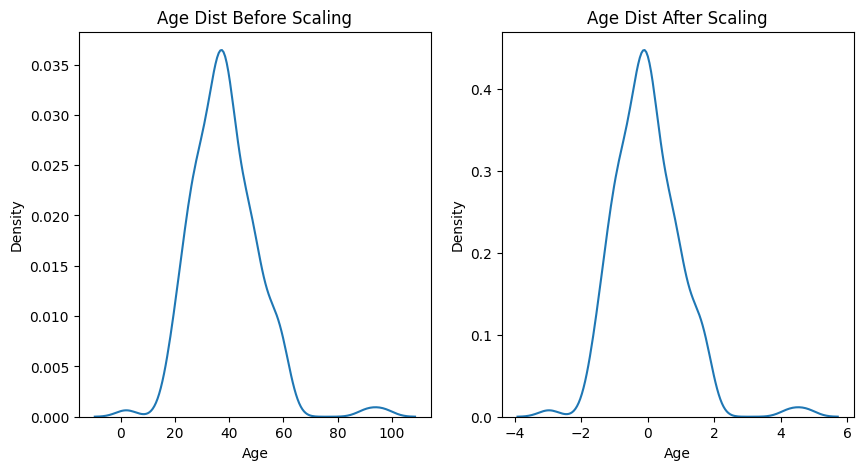

In [45]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (10,5))

## Before Scaling
ax1.set_title("Age Dist Before Scaling")
sns.kdeplot(X_train["Age"] , ax = ax1)

# After Scaling
ax2.set_title("Age Dist After Scaling")
sns.kdeplot(X_train_scaled["Age"] , ax = ax2)
plt.show()

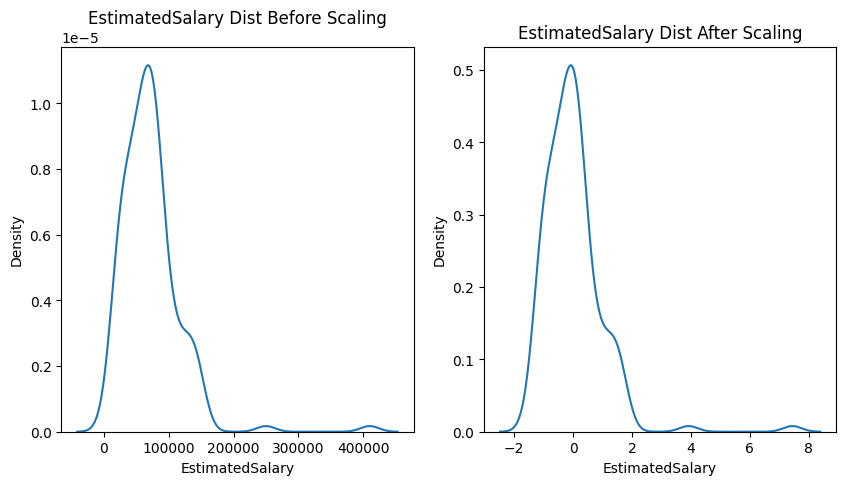

In [46]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (10,5))

## Before Scaling
ax1.set_title("EstimatedSalary Dist Before Scaling")
sns.kdeplot(X_train["EstimatedSalary"] , ax = ax1)

# After Scaling
ax2.set_title("EstimatedSalary Dist After Scaling")
sns.kdeplot(X_train_scaled["EstimatedSalary"] , ax = ax2)
plt.show()

In [47]:
df.describe()

,Age,EstimatedSalary,Purchased
count,406.000000,406.000000,406.000000
mean,38.034483,71972.906404,0.362069
std,12.076456,43534.368486,0.481192
min,2.000000,2000.000000,0.000000
25%,29.250000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,97.000000,410000.000000,1.000000
